In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation and validation libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Classifier libraries
from sklearn.ensemble import RandomForestClassifier

In [15]:
df = pd.read_csv('winequality-red.csv')

In [16]:
df['quality'] = np.where(df['quality'] >= 7, 1, 0)

### Preprocessing

In [17]:
X_train, X_test = train_test_split(df, test_size=0.20, random_state=42)
print("Train size: ", X_train.shape)
print("Test size: ", X_test.shape)

Train size:  (1279, 12)
Test size:  (320, 12)


In [18]:
def oversample_dataset(data):
    X = data.drop(columns={'quality'})
    y = data['quality']
    
    sm = SMOTE(random_state=42)
    
    X_sm, y_sm = sm.fit_resample(X, y)
    sm_df = pd.concat([X_sm, y_sm], axis=1)
    
    return sm_df

X_train_sm = oversample_dataset(X_train)

In [19]:
y_train = X_train_sm['quality']
y_test = X_test['quality']
X_train = X_train_sm.drop(columns={'quality'})
X_test = X_test.drop(columns={'quality'})

print("Train size: ", X_train.shape)
print("Test size: ", X_test.shape)

Train size:  (2218, 11)
Test size:  (320, 11)


In [20]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

### Model

<AxesSubplot:title={'center':'n Trees vs Precision'}, xlabel='n Trees', ylabel='Precision'>

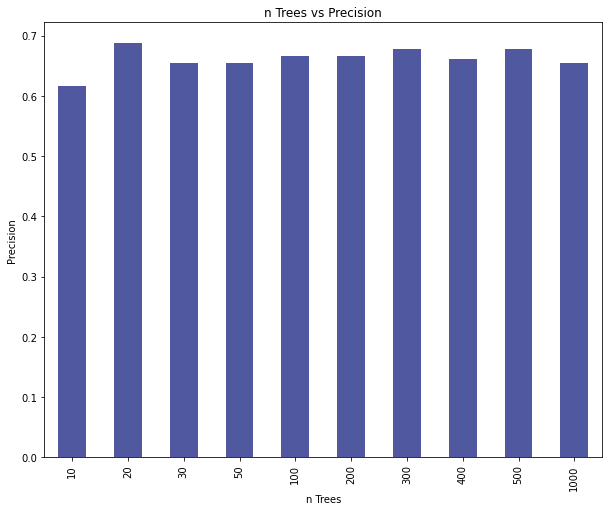

In [22]:
scores = []
estimators_score = []

n_estimators = [10, 20, 30, 50, 100, 200, 300, 400, 500, 1000]

for i in n_estimators:    
    model = RandomForestClassifier(i, n_jobs=-1, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = precision_score(y_test, y_pred)
    scores.append(score)
    estimators_score.append([i, score])
    
plt.figure(figsize=(10,8))
plt.title("n Trees vs Precision")
plt.xlabel("n Trees")
plt.ylabel("Precision")
pd.Series(scores, n_estimators).plot(kind='bar', color='#50589F')

In [23]:
id_n = pd.DataFrame(estimators_score, columns=['feature', 'score'])['score'].idxmax()
n_estimator = pd.DataFrame(estimators_score, columns=['feature', 'score'])['feature'][id_n]
print("n_estimators:", n_estimator)

n_estimators: 20


<AxesSubplot:title={'center':'Max Features vs Precision'}, xlabel='Max Features', ylabel='Precision'>

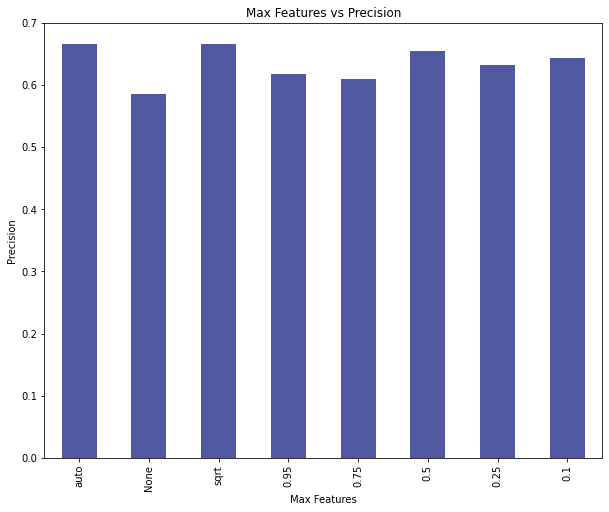

In [25]:
scores = []
features_score = []

max_features = ['auto', None, 'sqrt', 0.95, 0.75, 0.5, 0.25, 0.10]

for i in max_features:    
    model = RandomForestClassifier(max_features=i, n_jobs=-1, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = precision_score(y_test, y_pred)
    scores.append(score)
    features_score.append([i, score])
    
plt.figure(figsize=(10,8))
plt.title("Max Features vs Precision")
plt.xlabel("Max Features")
plt.ylabel("Precision")
pd.Series(scores, max_features).plot(kind='bar', color='#50589F')

In [27]:
id_feature = pd.DataFrame(features_score, columns=['feature', 'score'])['score'].idxmax()
max_feature = pd.DataFrame(features_score, columns=['feature', 'score'])['feature'][id_feature]
print("max_features:", max_feature)

max_features: auto


<AxesSubplot:title={'center':'Min Samples Leaf vs Precision'}, xlabel='Min Samples Leaf', ylabel='Precision'>

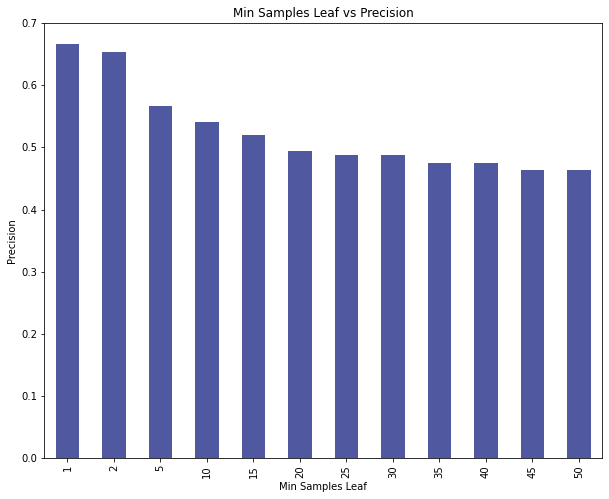

In [31]:
scores = []
leaf_score = []

min_samples_leaf = [1, 2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for i in min_samples_leaf:    
    model = RandomForestClassifier(min_samples_leaf=i, n_jobs=-1, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = precision_score(y_test, y_pred)
    scores.append(score)
    leaf_score.append([i, score])
    
plt.figure(figsize=(10,8))
plt.title("Min Samples Leaf vs Precision")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Precision")
pd.Series(scores, min_samples_leaf).plot(kind='bar', color='#50589F')

In [32]:
id_leaf = pd.DataFrame(leaf_score, columns=['feature', 'score'])['score'].idxmax()
leaf = pd.DataFrame(leaf_score, columns=['feature', 'score'])['feature'][id_leaf]
print("min_samples_leaf:", leaf)

min_samples_leaf: 1


In [33]:
def random_forest_features(X_train, X_test, y_train, y_test):

    estimators_score = []
    n_estimators = [10, 20, 30, 50, 100, 200, 300, 400, 500, 1000]

    for i in n_estimators:    
        model = RandomForestClassifier(i, n_jobs=-1, random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        score = precision_score(y_test, y_pred)
        estimators_score.append([i, score])
        
    id_n = pd.DataFrame(estimators_score, columns=['feature', 'score'])['score'].idxmax()
    n_estimator = pd.DataFrame(estimators_score, columns=['feature', 'score'])['feature'][id_n]
    

    features_score = []
    max_features = ['auto', None, 'sqrt', 0.95, 0.75, 0.5, 0.25, 0.10]

    for i in max_features:    
        model = RandomForestClassifier(max_features=i, n_jobs=-1, random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        score = precision_score(y_test, y_pred)
        features_score.append([i, score])
    
    id_feature = pd.DataFrame(features_score, columns=['feature', 'score'])['score'].idxmax()
    max_feature = pd.DataFrame(features_score, columns=['feature', 'score'])['feature'][id_feature]
    
    
    leaf_score = []
    min_samples_leaf = [1, 2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

    for i in min_samples_leaf:    
        model = RandomForestClassifier(min_samples_leaf=i, n_jobs=-1, random_state=42)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        score = precision_score(y_test, y_pred)
        leaf_score.append([i, score])
        
    id_leaf = pd.DataFrame(leaf_score, columns=['feature', 'score'])['score'].idxmax()
    leaf = pd.DataFrame(leaf_score, columns=['feature', 'score'])['feature'][id_leaf]
    
    
    response = {
        "n_estimators": n_estimator,
        "max_features": max_feature,
        "min_samples_leaf": leaf
    }
        
    return response

In [34]:
random_forest_features(X_train_scaled, X_test_scaled, y_train, y_test)

{'n_estimators': 20, 'max_features': 'auto', 'min_samples_leaf': 1}